In [9]:
import nibabel as nib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch
import numpy as np

def read_nifti(file_path):
    img = nib.load(file_path)
    data = img.get_fdata()
    return data

def generate_legend(color_map, labels):
    legend_elements = [Patch(color=color_map[label], label=f"Label {label}") for label in labels]
    return legend_elements

def visualize_segmentation(image, segmentation, color_map, slice_no,flag):
    unique_labels = np.unique(segmentation)
    
    # Display original image
    plt.subplot(1, 2, 1)
    if flag:
        plt.imshow(image[:,:,slice_no,0], cmap='gray')
    else:     
        plt.imshow(image[:,:,slice_no], cmap='gray')

    plt.title("Original Image")

    # Display segmentation
    plt.subplot(1, 2, 2)
    overlay = np.zeros_like(segmentation)

    for label in unique_labels:
        mask = (segmentation == label)
        overlay[mask] = label

    cmap = ListedColormap([color_map[label] for label in unique_labels])
    plt.imshow(overlay[:,:,slice_no], cmap=cmap, vmin=0, vmax=len(color_map)-1)
    plt.title("Segmentation Overlay")

    # Display legend
    legend_elements = generate_legend(color_map, unique_labels)
    plt.legend(handles=legend_elements, loc='upper right')

    plt.show()

--------------------------------------------

In [2]:
import os
import nibabel as nib
import numpy as np

def dice_score(prediction_folder, ground_truth_folder, labels=[1, 2, 3], output_file="average_dice_scores.txt"):
    dice_scores = {}

    # Get a list of all prediction files
    prediction_files = [f for f in os.listdir(prediction_folder) if f.endswith(".nii.gz")]

    for prediction_file in prediction_files:
        # Construct the corresponding ground truth file name
        gt_file = prediction_file.replace(".nii.gz", "_seg.nii.gz")

        # Full paths to the prediction and ground truth files
        prediction_path = os.path.join(prediction_folder, prediction_file)
        ground_truth_path = os.path.join(ground_truth_folder, gt_file)

        # Load NIfTI files
        prediction = nib.load(prediction_path).get_fdata()
        ground_truth = nib.load(ground_truth_path).get_fdata()

        
        for label in labels:
            # Create binary masks for the current label
            pred_mask = (prediction == label)
            gt_mask = (ground_truth == label)

            # Calculate Dice coefficient
            intersection = np.sum(np.logical_and(pred_mask, gt_mask))
            union = np.sum(np.logical_or(pred_mask, gt_mask))

            # because some samples have no non-enhancing tumor (label 1) and lead to division by zero
            if (union + intersection == 0):
                dice = 0
            else:
                dice = (2.0 * intersection) / (union + intersection)

            label_key = f"Label_{label}"
            if label_key not in dice_scores:
                dice_scores[label_key] = []

            dice_scores[label_key].append(dice)

    # Calculate average Dice scores
    average_dice_scores = {}
    for label, scores in dice_scores.items():
        average_dice_scores[label] = np.mean(scores)

    # Save average Dice scores to a text file
    with open(output_file, "w") as file:
        for label, score in average_dice_scores.items():
            file.write(f"{label}: {score}\n")

    return average_dice_scores




------------------------------------------

## BraTS Pediatric Testing (previous year last checkpoint)

In [3]:
prediction_folder = "/media/workstation04/New Volume/MMMAI/NVIDIA_PED/prediction/BraTS_PED_predictions"
ground_truth_folder = "/home/workstation04/GP_MMMAI/data/BraTS2021_train/labels"
output_file="/media/workstation04/New Volume/MMMAI/NVIDIA_PED/nvidia_PED_average_dice_scores_lastckpt.txt"
dice_score_avg = dice_score(prediction_folder, ground_truth_folder, output_file = output_file)
print(dice_score_avg)

{'Label_1': 0.25970747387210275, 'Label_2': 0.13906639624233827, 'Label_3': 0.5064725228325578}


Segmentation Dimensions: (240, 240, 155)


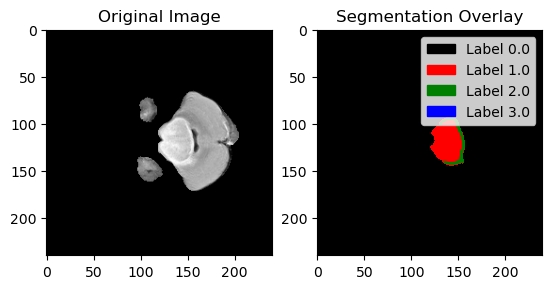

In [12]:
# BraTS PED
#  ground truth
fname = 1728
image_path = f"/home/workstation04/GP_MMMAI/data/BraTS2021_train/images/BraTS2021_0{fname}.nii.gz"
segmentation_path =  f"/home/workstation04/GP_MMMAI/data/BraTS2021_train/labels/BraTS2021_0{fname}_seg.nii.gz"
# Read NIfTI files
image_data = read_nifti(image_path)
segmentation_data = read_nifti(segmentation_path)

# Display dimensions of the segmentation file
print(f"Segmentation Dimensions: {segmentation_data.shape}")

# Define the colormap based on specified labels and colors
labels = np.unique(segmentation_data)
colors = ['black', 'red', 'green', 'blue']
color_map = dict(zip(labels, colors))

# Visualize segmentation overlay
visualize_segmentation(image_data, segmentation_data, color_map, 28, 1)

Segmentation Dimensions: (240, 240, 155)


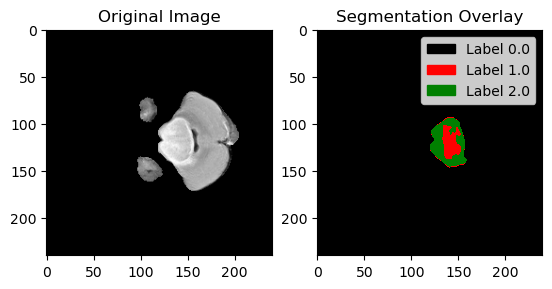

In [14]:
# BraTS PED
#  prediction
fname = 1728
image_path = f"/home/workstation04/GP_MMMAI/data/BraTS2021_train/images/BraTS2021_0{fname}.nii.gz"
segmentation_path =  f"/media/workstation04/New Volume/MMMAI/NVIDIA_PED/prediction/BraTS_PED_predictions/BraTS2021_0{fname}.nii.gz"
# Read NIfTI files
image_data = read_nifti(image_path)
segmentation_data = read_nifti(segmentation_path)

# Display dimensions of the segmentation file
print(f"Segmentation Dimensions: {segmentation_data.shape}")

# Define the colormap based on specified labels and colors
labels = np.unique(segmentation_data)
colors = ['black', 'red', 'green', 'blue']
color_map = dict(zip(labels, colors))

# Visualize segmentation overlay
visualize_segmentation(image_data, segmentation_data, color_map, 28 , 1)

----------------------------------